In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scs

In [2]:
def stats_for_variable(df, variable_id):
    col = np.array(df[[variable_id]].values).reshape(-1)
    col_cleaned = col[~np.isnan(col)] # remove NaN values
    sample_cnt = col_cleaned.shape[0]

    # MLE estimates
    col_mean_mle = col_cleaned.sum() / sample_cnt
    col_variance_mle = ((col_cleaned - col_mean_mle) ** 2).sum() / sample_cnt
    
    print(f"Statistics for a variable \"{variable_id}\":")
    print(f"- number of not NaN samples: {sample_cnt},") 
    print(f"- maximum-likelihood estimate for mean: {col_mean_mle:.3f},")
    print(f"- maximum-likelihood estimate for variance: {col_variance_mle:.3f}.")
    print(f"Histogram overlayed with estimated normal distribution pdf:")
    bins_cnt = 30
    plt.hist(np.hstack(col_cleaned), bins=bins_cnt)

    # histogram overlay with the estimated Normal distribution
    xmin, xmax = plt.xlim()
    bin_width = (xmax - xmin) / bins_cnt
    x = np.linspace(xmin, xmax, 100)
    pdf = scs.norm.pdf(x, col_mean_mle, np.sqrt(col_variance_mle))
    plt.plot(x, pdf * sample_cnt * bin_width, linewidth=2, color="orange")
    axes = plt.gca()
    axes.set_xlabel("value of a sample")
    axes.set_ylabel("number of samples")
    plt.show()

In [3]:
sc_collage_df = pd.read_csv("data/social_capital_college.csv")
sc_county_df = pd.read_csv("data/social_capital_county.csv")
sc_high_school_df = pd.read_csv("data/social_capital_high_school.csv")
sc_zip_df = pd.read_csv("data/social_capital_zip.csv")
print("Number of samples for each data set (including NaN values):")
print(f"- data set \"social_capital_college.csv\": {sc_collage_df.shape[0]},")
print(f"- data set \"social_capital_county.csv\": {sc_county_df.shape[0]},")
print(f"- data set \"social_capital_high_school.csv\": {sc_high_school_df.shape[0]},")
print(f"- data set \"social_capital_zip.csv\": {sc_zip_df.shape[0]}.")

Number of samples for each data set (including NaN values):
- data set "social_capital_college.csv": 2586,
- data set "social_capital_county.csv": 3089,
- data set "social_capital_high_school.csv": 17525,
- data set "social_capital_zip.csv": 23028.


Statistics for a variable "ec_zip":
- number of not NaN samples: 18980,
- maximum-likelihood estimate for mean: 0.883,
- maximum-likelihood estimate for variance: 0.048.
Histogram overlayed with estimated normal distribution pdf:


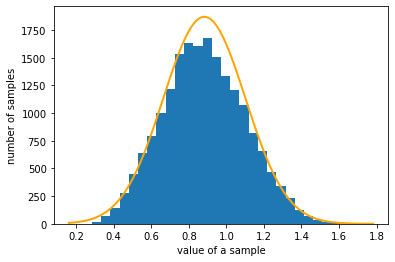

In [4]:
stats_for_variable(sc_zip_df, "ec_zip")

Statistics for a variable "nbhd_ec_zip":
- number of not NaN samples: 14285,
- maximum-likelihood estimate for mean: 0.840,
- maximum-likelihood estimate for variance: 0.130.
Histogram overlayed with estimated normal distribution pdf:


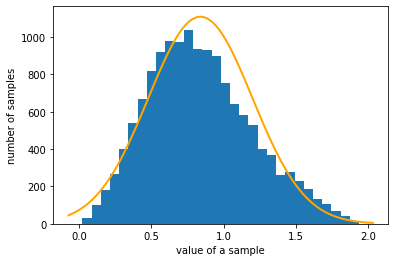

In [5]:
stats_for_variable(sc_zip_df, "nbhd_ec_zip")

Statistics for a variable "ec_grp_mem_zip":
- number of not NaN samples: 18337,
- maximum-likelihood estimate for mean: 0.955,
- maximum-likelihood estimate for variance: 0.068.
Histogram overlayed with estimated normal distribution pdf:


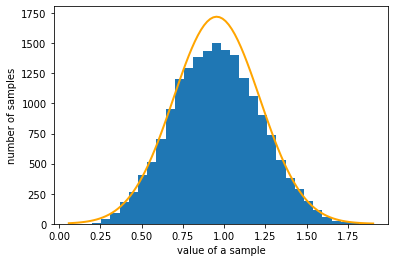

In [6]:
stats_for_variable(sc_zip_df, "ec_grp_mem_zip")

Statistics for a variable "ec_high_zip":
- number of not NaN samples: 18980,
- maximum-likelihood estimate for mean: 1.317,
- maximum-likelihood estimate for variance: 0.043.
Histogram overlayed with estimated normal distribution pdf:


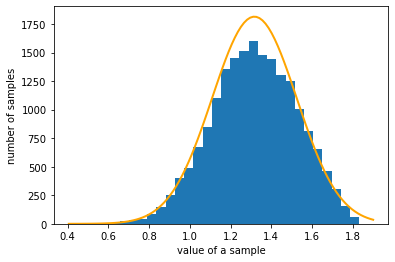

In [7]:
stats_for_variable(sc_zip_df, "ec_high_zip")

Statistics for a variable "nbhd_ec_high_zip":
- number of not NaN samples: 14285,
- maximum-likelihood estimate for mean: 1.185,
- maximum-likelihood estimate for variance: 0.122.
Histogram overlayed with estimated normal distribution pdf:


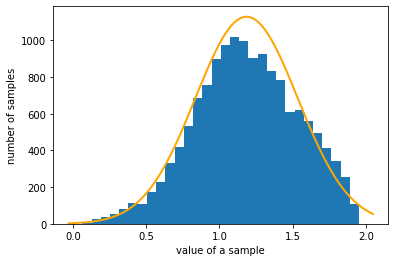

In [8]:
stats_for_variable(sc_zip_df, "nbhd_ec_high_zip")

Statistics for a variable "ec_grp_mem_high_zip":
- number of not NaN samples: 18337,
- maximum-likelihood estimate for mean: 1.357,
- maximum-likelihood estimate for variance: 0.051.
Histogram overlayed with estimated normal distribution pdf:


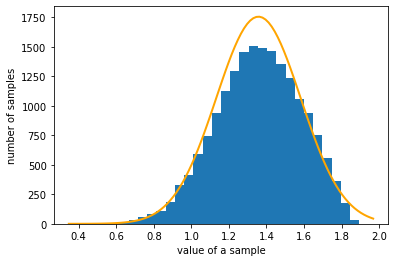

In [9]:
stats_for_variable(sc_zip_df, "ec_grp_mem_high_zip")

Statistics for a variable "exposure_grp_mem_zip":
- number of not NaN samples: 18337,
- maximum-likelihood estimate for mean: 1.005,
- maximum-likelihood estimate for variance: 0.057.
Histogram overlayed with estimated normal distribution pdf:


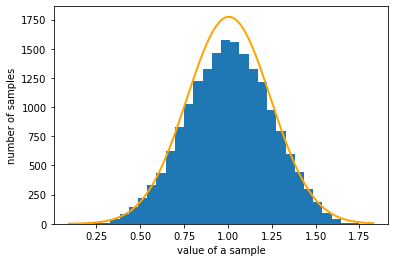

In [10]:
stats_for_variable(sc_zip_df, "exposure_grp_mem_zip")

Statistics for a variable "nbhd_exposure_zip":
- number of not NaN samples: 14285,
- maximum-likelihood estimate for mean: 0.929,
- maximum-likelihood estimate for variance: 0.125.
Histogram overlayed with estimated normal distribution pdf:


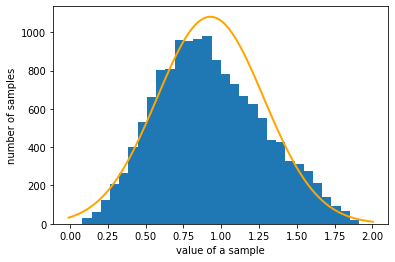

In [11]:
stats_for_variable(sc_zip_df, "nbhd_exposure_zip")

Statistics for a variable "clustering_zip":
- number of not NaN samples: 23028,
- maximum-likelihood estimate for mean: 0.106,
- maximum-likelihood estimate for variance: 0.000.
Histogram overlayed with estimated normal distribution pdf:


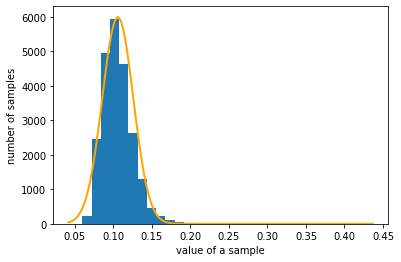

In [12]:
stats_for_variable(sc_zip_df, "clustering_zip")

Statistics for a variable "volunteering_rate_zip":
- number of not NaN samples: 23025,
- maximum-likelihood estimate for mean: 0.077,
- maximum-likelihood estimate for variance: 0.001.
Histogram overlayed with estimated normal distribution pdf:


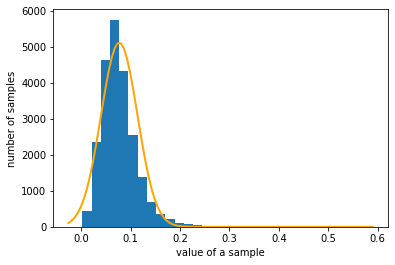

In [13]:
stats_for_variable(sc_zip_df, "volunteering_rate_zip")

In [14]:
selected_cols = sc_zip_df[["ec_zip", 
                           "ec_grp_mem_zip", 
                           "exposure_grp_mem_zip"]]
print("Covariance matrix of the chosen columns:")
selected_cols.cov()

Covariance matrix of the chosen columns:


,ec_zip,ec_grp_mem_zip,exposure_grp_mem_zip
ec_zip,0.047756,0.054757,0.048092
ec_grp_mem_zip,0.054757,0.068441,0.060381
exposure_grp_mem_zip,0.048092,0.060381,0.056931


In [15]:
print("Correlation between chosen columns:")
selected_cols.corr()

Correlation between chosen columns:


,ec_zip,ec_grp_mem_zip,exposure_grp_mem_zip
ec_zip,1.000000,0.966891,0.931110
ec_grp_mem_zip,0.966891,1.000000,0.967315
exposure_grp_mem_zip,0.931110,0.967315,1.000000
